<a href="https://colab.research.google.com/github/prajakta1211/Psychometric-analysis-for-colour-/blob/main/MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split



dataframe = pandas.read_csv("/content/Group A  DataSet - Colour and Personality data-12.3.22- for CCEWPUNE.csv")
dataframe.drop(dataframe.columns[0],axis=1,inplace=True)
dataframe['Gender'] = dataframe['Gender'].replace("Female",1)
dataframe['Gender'] = dataframe['Gender'].replace("Male",0)
dataframe['Age'].fillna(value=dataframe['Age'].mean(),inplace=True)
dataframe.fillna(value=0,inplace=True)
#dataframe.drop(dataframe.loc[:,'OUTPUT 2':'OUTPUT 8'].columns,axis=1,inplace=True)

dataframe.head()



,Gender,Age,PARAM 1,PARAM 2,PARAM 3,PARAM 4,PARAM 5,PARAM 6,PARAM 7,PARAM 8,OUTPUT 1,OUTPUT 2,OUTPUT 3,OUTPUT 4,OUTPUT 5,OUTPUT 6,OUTPUT 7,OUTPUT 8
0,1,19.70,44,55,55,33,57,80,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,19.10,55,44,66,0,42,80,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,20.10,33,33,22,33,71,60,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1,19.70,11,100,66,66,28,40,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,19.11,66,55,22,44,42,20,0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


(array([1453]),)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


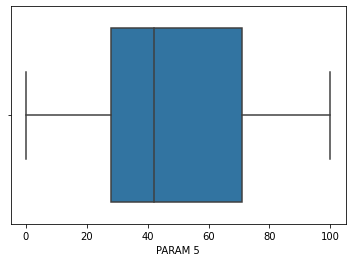

In [ ]:
import seaborn as sns
# sns.boxplot(dataframe['Age'])
print(np.where(dataframe['Age']>1750))
sns.boxplot(dataframe['PARAM 5'])



In [ ]:
# get the dataset
def get_dataset():
  Xfeatures = dataframe[['Gender','Age','PARAM 1','PARAM 3','PARAM 4','PARAM 5','PARAM 6','PARAM 7']]
  ylabels = dataframe['OUTPUT 2']

  X = Xfeatures.to_numpy()
  y = ylabels.to_numpy()
  return X,y
 

In [ ]:

# SVM for multi-class classification using built-in one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
# define dataset
features = dataframe[['Gender','Age','PARAM 1','PARAM 3','PARAM 4','PARAM 5','PARAM 6','PARAM 7']]
labels = dataframe['OUTPUT 1']
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.25, random_state=0)
# define model
model = SVC(decision_function_shape='ovo')
# fit model
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)
score = model.score(X_test, y_test)
print(score)

0.741106719367589


In [ ]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# define dataset

features = dataframe[['Gender','Age','PARAM 1','PARAM 3','PARAM 4','PARAM 5','PARAM 6','PARAM 7']]
labels = dataframe['OUTPUT 1']
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.25, random_state=0)
# define model
logisticRegr = LogisticRegression(multi_class='ovr')
# fit model
logisticRegr.fit(X_train, y_train)
threshold = 0.5
# make predictions
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.741106719367589


In [ ]:
# Here we are using 7 different estimators with Grid search to find the best model.

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm  
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# ignore ConvergenceWarnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
features = dataframe[['Gender','Age','PARAM 1','PARAM 3','PARAM 4','PARAM 5','PARAM 6','PARAM 7']]
labels = dataframe['OUTPUT 1']
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.25, random_state=0)
models = [
    { "estimater": KNeighborsClassifier(),
      "params": {
          "n_neighbors": [25,30,35,45],
          "weights": ['uniform','distance'],
          "leaf_size": [25,30,35],
          "p": [1,2,3],
        }
    },
    { "estimater": DecisionTreeClassifier(),
      "params": {
          "criterion": ['gini','entropy'],
          "splitter": ['best','random'],
          "max_depth": [None,90,95,100],
          "max_features": [None, "auto","sqrt","log2"],
          "random_state": [42]
      }
    },
    { "estimater": MultinomialNB(),
      "params": {
          "fit_prior": [True, False]    
      }
    },
    { "estimater": LinearSVC(),
      "params": {
          "loss": ['hinge','squared_hinge'],
          "multi_class": ['ovr', 'crammer_singer'],
          "fit_intercept": [True, False],
          "random_state": [42],
          "max_iter": [900, 1000, 1100]
      }
    },
    { "estimater": svm.SVC(),
      "params": {
          'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']
      }
    },
    { "estimater": RandomForestClassifier(),
      "params": {
      "criterion": ['gini','entropy'],
      "bootstrap": [True, False],
      "max_depth": [85,90,95,100],
      "max_features": ['sqrt','log2'],
      "n_estimators": [60, 80, 90],
      "random_state": [42]
      }
    },
    { "estimater": SGDClassifier(),
      "params": {
          "loss": ['hinge','log','perceptron'], 
          "penalty": ['l2', 'l1'], 
          "alpha": [0.0001, 0.0003, 0.0010],
          "early_stopping": [True],
          "max_iter": [1000, 1500],
          "random_state": [42]
      }
    }
]

column_names = ["KNeighbors", "DecisionTree", "MultiNB", "SVC", "SVM", "RFC", "SGDClassifier"]
entries = []

highest_acc = 0
best_model = None

for model in models:
  print(model["estimater"])

  # Create model
  clf = model["estimater"]
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = clf, param_grid = model["params"], 
                            cv = 5)
  
  # Fit the model
  grid_search.fit(X_train, y_train);

  # Make a prediction on the test split to find model accuracy
  predicted = grid_search.predict(X_test)
  acc = accuracy_score(predicted, y_test)
  entries.append(acc)

  print(grid_search.best_params_)

  # If model have the highest accuracy, it's out best model
  if acc > highest_acc:
    highest_acc = acc
    best_model = grid_search



KNeighborsClassifier()
{'leaf_size': 25, 'n_neighbors': 45, 'p': 3, 'weights': 'distance'}
DecisionTreeClassifier()
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'random_state': 42, 'splitter': 'random'}
MultinomialNB()
{'fit_prior': True}
LinearSVC()
{'fit_intercept': True, 'loss': 'hinge', 'max_iter': 900, 'multi_class': 'crammer_singer', 'random_state': 42}
SVC()
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
RandomForestClassifier()
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 85, 'max_features': 'sqrt', 'n_estimators': 80, 'random_state': 42}
SGDClassifier()
{'alpha': 0.001, 'early_stopping': True, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42}


       Estimater  Accuracy
0     KNeighbors  0.743083
1   DecisionTree  0.632411
2        MultiNB  0.713439
3            SVC  0.741107
4            SVM  0.747036
5            RFC  0.731225
6  SGDClassifier  0.715415


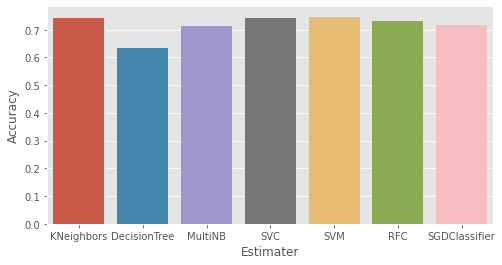

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
column_names = ["KNeighbors", "DecisionTree", "MultiNB", "SVC", "SVM", "RFC", "SGDClassifier"]

df = pd.DataFrame({"Estimater": column_names, 
                   "Accuracy": entries
                  })


plt.figure(figsize=(8, 4))
sns.barplot(x='Estimater', y='Accuracy', data=df)
print(df)